In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import langid
import seaborn as sns


In [2]:
file_path = "C:/yelpdataset/yelp_academic_dataset_review.json"

data = []  # Create an empty list to store JSON data

with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        try:
            json_data = json.loads(line)
            data.append(json_data)  # Append JSON data to the list
        except json.JSONDecodeError as e:
            print(f"Error: JSONDecodeError - Error Message: {str(e)}")

# Convert JSON data to a DataFrame
df_reviews = pd.DataFrame(data)

# Convert the "date" column to the datetime data type
df_reviews["date"] = pd.to_datetime(df_reviews["date"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Display the "date" column
print(df_reviews["date"])


0         2018-07-07 22:09:11
1         2012-01-03 15:28:18
2         2014-02-05 20:30:30
3         2015-01-04 00:01:03
4         2017-01-14 20:54:15
                  ...        
6990275   2014-12-17 21:45:20
6990276   2021-03-31 16:55:10
6990277   2019-12-30 03:56:30
6990278   2022-01-19 18:59:27
6990279   2018-01-02 22:50:47
Name: date, Length: 6990280, dtype: datetime64[ns]


In [3]:
min_date = df_reviews["date"].min()
max_date = df_reviews["date"].max()

date_range_df = pd.DataFrame({"Min Date": [min_date], "Max Date": [max_date]})

print(date_range_df)
date_range_df.to_clipboard()


             Min Date            Max Date
0 2005-02-16 03:23:22 2022-01-19 19:48:45


In [4]:
# Reset row names
df_reviews.index = range(1, len(df_reviews) + 1)

In [5]:
'''
file_review = "C:/yelpdataset/yelp_academic_dataset_review.json"

# Read the file with UTF-8 encoding
with open(file_review, "r", encoding="utf-8") as f:
    input_data = f.readlines()[100]

# Convert JSON lines to DataFrame
reviews = pd.DataFrame([json.loads(line) for line in input_data])

# Reset row names
reviews.index = range(1, len(reviews) + 1)
'''

'\nfile_review = "C:/yelpdataset/yelp_academic_dataset_review.json"\n\n# Read the file with UTF-8 encoding\nwith open(file_review, "r", encoding="utf-8") as f:\n    input_data = f.readlines()[100]\n\n# Convert JSON lines to DataFrame\nreviews = pd.DataFrame([json.loads(line) for line in input_data])\n\n# Reset row names\nreviews.index = range(1, len(reviews) + 1)\n'

In [5]:
# Select desired columns
keeps = ["date", "stars", "text", "business_id"]
reviews = df_reviews[keeps]

# Convert "stars" and "text" columns
reviews["stars"] = pd.to_numeric(reviews["stars"])
reviews["text"] = reviews["text"].astype(str)

# Print rows 16 to 17
print(reviews.iloc[15:17, :])

reviews.iloc[15:17, :].to_clipboard()


C:\Users\ezgit\AppData\Local\Temp\ipykernel_15076\3102668224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["stars"] = pd.to_numeric(reviews["stars"])
C:\Users\ezgit\AppData\Local\Temp\ipykernel_15076\3102668224.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["text"] = reviews["text"].astype(str)


                  date  stars  \
16 2014-10-11 16:22:06    5.0   
17 2013-06-24 11:21:25    5.0   

                                                 text             business_id  
16  Great place for breakfast! I had the waffle, w...  BVndHaLihEYbr76Z0CMEGw  
17  Tremendous service (Big shout out to Douglas) ...  YtSqYv1Q_pOltsVPSx54SA  


In [6]:
# Get the minimum and maximum values of the "date" field
min_date = reviews["date"].min()
max_date = reviews["date"].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2005-02-16 03:23:22
Maximum date: 2022-01-19 19:48:45


In [7]:
#import the business dataset
file_business = "C:/yelpdataset/yelp_academic_dataset_business.json"

# Read the file with UTF-8 encoding
with open(file_business, "r", encoding="utf-8") as f:
    input_data2 = f.readlines()

# Convert JSON lines to DataFrame
business = pd.DataFrame([json.loads(line) for line in input_data2])

# Reset row names
business.index = range(1, len(business) + 1)

In [8]:
# Function to remove punctuation and title case city names
def clean_category(category):
    if category is not None:
        category = category.replace('Mexican, Restaurants','Restaurants, Mexican')
        category = category.replace('Pizza, Restaurants','Restaurants, Pizza')
        category = category.replace('Italian, Restaurants','Restaurants, Italian')
        category = category.replace('Chinese, Restaurants','Restaurants, Chinese')
        category = category.replace('Indian, Restaurants','Restaurants, Indian')
        category = category.replace('Thai, Restaurants','Restaurants, Thai')
        category = category.replace('Korean, Restaurants','Restaurants, Korean')
        category = category.replace('Japanese, Restaurants','Restaurants, Japanese')
        category = category.replace('Greek, Restaurants','Restaurants, Greek')
        category = category.replace('American (New), Restaurants','Restaurants, American (New)')
        category = category.replace('American (Traditional), Restaurants','Restaurants, American (Traditional)')
        category = category.replace('Seafood, Restaurants','Restaurants, Seafood')
        category = category.replace('Steakhouses, Restaurants','Restaurants, Steakhouses')
        category = category.replace('Vietnamese, Restaurants','Restaurants, Vietnamese')
        category = category.replace('Barbeque, Restaurants','Restaurants, Barbeque')
        category = category.replace('Burgers, Restaurants','Restaurants, Burgers')
        category = category.replace('Diners, Restaurants','Restaurants, Diners')
        category = category.replace('Sushi Bars, Restaurants','Restaurants, Sushi Bars')
        category = category.replace('Cajun/Creole, Seafood, Restaurants','Restaurants, Cajun/Creole, Seafood')
        category = category.replace('Breakfast & Brunch, Restaurants','Restaurants, Breakfast & Brunch')


        category = category.replace('Coffee & Tea, Food','Food, Coffee & Tea')
        category = category.replace('Grocery, Food','Food, Grocery')   
        category = category.replace('Ice Cream & Frozen Yogurt, Food','Food, Ice Cream & Frozen Yogurt')  


        category = category.replace('Beer, Wine & Spirits, Food','Food, Beer, Wine & Spirits')   

        category = category.replace('Beauty & Spas, Barbers','Barbers, Beauty & Spas')   
        category = category.replace('Beauty & Spas, Barbers','Barbers, Beauty & Spas')   
        category = category.replace('Beauty & Spas, Hair Salons','Hair Salons, Beauty & Spas')
        
        category = category.replace('Auto Repair, Automotive','Automotive, Auto Repair')
        category = category.replace('Car Wash, Automotive','Automotive, Car Wash')

        category = category.replace('Pets, Veterinarians','Veterinarians, Pets')

        category = category.replace('Apartments, Real Estate, Home Services','Real Estate, Apartments, Home Services')
        category = category.replace('Real Estate, Home Services, Apartments','Real Estate, Apartments, Home Services')
        category = category.replace('Home Services, Real Estate, Apartments','Real Estate, Apartments, Home Services')
        category = category.replace('Home Services, Apartments, Real Estate','Real Estate, Apartments, Home Services')
        category = category.replace('Apartments, Home Services, Real Estate','Real Estate, Apartments, Home Services')

        category = category.replace('Banks & Credit Unions, Financial Services','Financial Services, Banks & Credit Unions')

        category = category.replace('Hotels, Event Planning & Services, Hotels & Travel','Hotels, Hotels & Travel, Event Planning & Services')    
        category = category.replace('Hotels & Travel, Event Planning & Services, Hotels','Hotels, Hotels & Travel, Event Planning & Services')    
        category = category.replace('Event Planning & Services, Hotels, Hotels & Travel','Hotels, Hotels & Travel, Event Planning & Services')    
        category = category.replace('Event Planning & Services, Hotels & Travel, Hotels','Hotels, Hotels & Travel, Event Planning & Services')    
        category = category.replace('Hotels & Travel, Hotels, Event Planning & Services','Hotels, Hotels & Travel, Event Planning & Services')    

    return category.title() if category is not None else category

business['categories'] = business['categories'].apply(clean_category)
print(business[['categories']])



                                               categories
1       Doctors, Traditional Chinese Medicine, Naturop...
2       Shipping Centers, Local Services, Notaries, Ma...
3       Department Stores, Shopping, Fashion, Home & G...
4       Restaurants, Food, Bubble Tea, Coffee & Tea, B...
5                               Brewpubs, Breweries, Food
...                                                   ...
150342                         Nail Salons, Beauty & Spas
150343  Pets, Nurseries & Gardening, Pet Stores, Hobby...
150344  Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150345  Fitness/Exercise Equipment, Eyewear & Optician...
150346  Beauty & Spas, Permanent Makeup, Piercing, Tattoo

[150346 rows x 1 columns]


In [9]:
# Select desired columns
keeps_business = ["business_id", "name", "city", "stars", "review_count", "categories"]
business = business[keeps_business]

# Print rows 21 to 22
print(business.iloc[20:22, :])
business.iloc[20:22, :].to_clipboard()

               business_id                            name          city  \
21  WKMJwqnfZKsAae75RMP6jA  Roast Coffeehouse and Wine Bar      Edmonton   
22  qhDdDeI3K4jy2KyzwFN53w      Barnes & Noble Booksellers  Indianapolis   

    stars  review_count                                         categories  
21    4.0            40  Food, Coffee & Tea, Cafes, Bars, Wine Bars, Re...  
22    4.0            38   Shopping, Books, Mags, Music & Video, Bookstores  


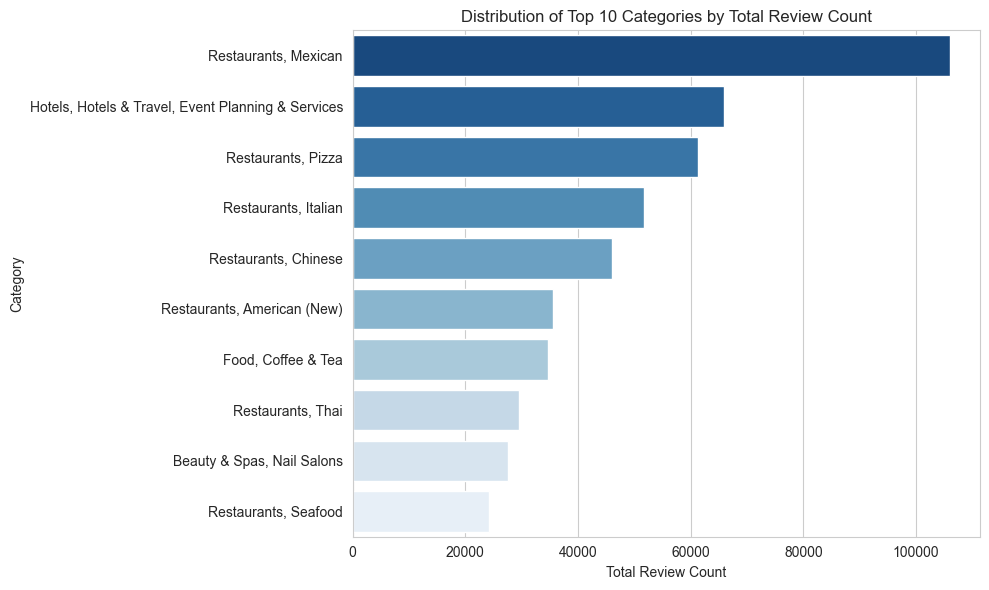

In [10]:
#Distribution of Top 10 Categories by Total Review Count
# Group businesses by category and calculate the sum of review counts
category_review_counts = business.groupby('categories')['review_count'].sum()

# Filter the top 10 categories with the highest review counts
top_10_categories = category_review_counts.nlargest(10)

# Choose a Seaborn color palette
color_palette = 'Blues_r'  # Example: using the 'Blues_r' palette

# Set Seaborn style
sns.set_style('whitegrid')

# Create a bar plot with the chosen color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette=color_palette)
plt.xlabel('Total Review Count')
plt.ylabel('Category')
plt.title('Distribution of Top 10 Categories by Total Review Count')
plt.tight_layout()
plt.show()


In [11]:
#Furthermore, I am only interested in restaurants for my further analysis. So let's remove all other businesses.
# Check if 'Restaurants' is present in the 'categories' column
business["is_restaurant"] = business["categories"].str.contains("Restaurant")

# Filter rows where 'is_restaurant' is True
business = business[business["is_restaurant"] == True]

# Print rows 144 to 147
print(business.iloc[143:147, :])

# Filter 'reviews' DataFrame based on 'business_id' present in 'business'
restaurant_reviews = reviews[reviews["business_id"].isin(business["business_id"])]




                business_id                           name           city  \
392  j9Kaj_6tSeXmVMYCgZithg                    Noble Crust  Wesley Chapel   
393  EIlFs8kybcG-l60GJjNUIA                 Domino's Pizza        Oldsmar   
395  z9wCTHYI2VZy9YIblwSsgg  The Silo Eatery Coffee Bakery          Tampa   
402  4xhGQGdGqU60BIznBjqnuA   California Tacos and Taproom     Isla Vista   

     stars  review_count                                         categories  \
392    4.5           496  Restaurants, Italian, Nightlife, Southern, Bar...   
393    2.5            20      Pizza, Chicken Wings, Restaurants, Sandwiches   
395    4.0             5   Coffee & Tea, Restaurants, Food, Cafes, Bakeries   
402    4.0            49  Mexican, Beer Bar, Bars, Sports Bars, Nightlif...   

    is_restaurant  
392          True  
393          True  
395          True  
402          True  


#### Exploratory Data Analysis

In [12]:
#average number of reviews per business 

np.mean(business['review_count'])

87.241077917607

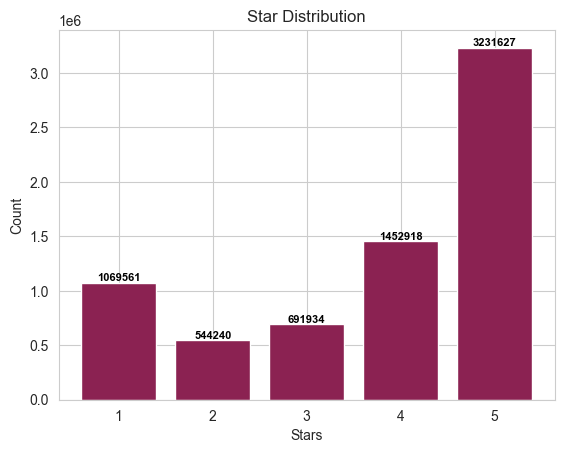

In [13]:
# the distribution stars
import matplotlib.pyplot as plt

# Calculate value counts for each star rating
counts = reviews["stars"].value_counts().sort_index()

# Create the bar plot
plt.bar(counts.index, counts.values, color="#8B2252")

# Add count labels to the bars
for x, y in zip(counts.index, counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color="black", fontweight="bold", fontsize=8)

# Set the title and labels
plt.title("Star Distribution")
plt.xlabel("Stars")
plt.ylabel("Count")

# Show the plot
plt.show()


In [14]:
len(restaurant_reviews)

4724684

#### Text Pre-processing

In [15]:
#Removing non-English reviews
# Concatenate text from restaurant_reviews
text_concatenated = " ".join(restaurant_reviews.iloc[19:29]["text"])

# Detect the language
language = langid.classify(text_concatenated)[0]

# Print the detected language
print(language)



en


In [16]:
#what language are the reviews written in

restaurant_reviews = restaurant_reviews.iloc[:50000, :]
print(len(restaurant_reviews))

# Use langid to detect language
restaurant_reviews["language"] = restaurant_reviews["text"].apply(langid.classify)

# Print the updated DataFrame
print(restaurant_reviews)


50000
                     date  stars  \
1     2018-07-07 22:09:11    3.0   
3     2014-02-05 20:30:30    3.0   
4     2015-01-04 00:01:03    5.0   
5     2017-01-14 20:54:15    4.0   
6     2015-09-23 23:10:31    1.0   
...                   ...    ...   
69255 2013-07-17 22:11:02    3.0   
69257 2017-10-14 01:50:36    1.0   
69258 2017-01-30 15:08:33    5.0   
69260 2014-06-29 21:50:39    5.0   
69261 2013-02-01 04:32:29    5.0   

                                                    text  \
1      If you decide to eat here, just be aware it is...   
3      Family diner. Had the buffet. Eclectic assortm...   
4      Wow!  Yummy, different,  delicious.   Our favo...   
5      Cute interior and owner (?) gave us tour of up...   
6      I am a long term frequent customer of this est...   
...                                                  ...   
69255  Kelly's is a pretty solid spot for brunch.  Th...   
69257  Not a good experience. My friend got a large g...   
69258  We went for br

In [ ]:
# Remove tuple values
restaurant_reviews['language'] = restaurant_reviews['language'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# As expected, English is by far the most common. However, Scotish seems to be extremely popular too, which is unexpected. I will inspect the Scotish reviews more closely, but first let's see what a random selection of the other languages look like.
plt.figure(figsize=(8, 6))
plt.bar(restaurant_reviews['language'].value_counts().index, restaurant_reviews['language'].value_counts().values, color='purple')
plt.title('Language Count')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


In [23]:
#language distribution
restaurant_reviews['language'].value_counts()

language
en    49937
es       24
it        6
de        6
fr        6
zh        3
nl        3
id        3
pt        2
sv        2
mt        1
fi        1
ro        1
da        1
an        1
is        1
nn        1
eu        1
Name: count, dtype: int64

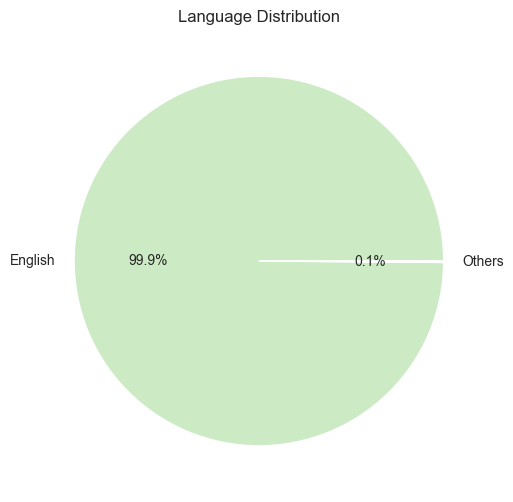

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

language_counts = restaurant_reviews['language'].value_counts()

# Grouping language values as "English" and "Others"
language_labels = ['English', 'Others']
language_sizes = [language_counts['en'], language_counts.sum() - language_counts['en']]

# Define the color palette
color_palette = sns.color_palette('Set3_r')

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_sizes, labels=language_labels, autopct='%1.1f%%', colors=color_palette)
plt.title('Language Distribution')
plt.show()


In [26]:
#detecting other languages
foreignText = restaurant_reviews[(restaurant_reviews['language'] != 'en')]
foreignText.iloc[0:22, :].to_clipboard()


In [27]:
#I will remove anything other than english.
restaurant_reviews = restaurant_reviews[(restaurant_reviews['language'] == 'en') ]


Creating output variable (Sentiment) from Star Rating

In [28]:
'''It would make sense to associate 4- and 5-star reviews with a positive sentiment and 1- and 2-star reviews with a negative sentiment.
3-star reviews would be neutral, but for simplicity purposes, we will only attempt to predict the positive and negative sentiment, 
and we will revisit neutral later. This is because our goal is to train a model to recognize positive or negative language, and 3-star reviews are likely to contain both. 
In normal language, neutral sentiment would mean that we are not using any words with an associated emotion, whereas this is not the case for reviews. 
Rather, customers assigning 3-star ratings are likely to have enjoyed some aspects and not enjoyed others. For this reason, I believe including a 
''neutral' category is likely to affect our model accuracy and I would rather discard it for now.'''

restaurant_reviews = restaurant_reviews[restaurant_reviews['stars'] != 3]


In [29]:
#Let's now create a binary variable for the sentiment:
# Convert the 'stars' column to a categorical variable (factor) based on a condition
restaurant_reviews['positive'] = restaurant_reviews['stars'] > 3

# Convert the 'positive' column to a categorical variable (factor)
restaurant_reviews['positive'] = restaurant_reviews['positive'].astype('category')

# Get the counts of each category in the 'positive' column
positive_counts = restaurant_reviews['positive'].value_counts()

print(positive_counts)

positive
True     34278
False     9382
Name: count, dtype: int64


In [30]:
restaurant_reviews

,date,stars,text,business_id,language,positive
4,2015-01-04 00:01:03,5.0,"Wow! Yummy, different, delicious. Our favo...",kxX2SOes4o-D3ZQBkiMRfA,en,True
5,2017-01-14 20:54:15,4.0,Cute interior and owner (?) gave us tour of up...,e4Vwtrqf-wpJfwesgvdgxQ,en,True
6,2015-09-23 23:10:31,1.0,I am a long term frequent customer of this est...,04UD14gamNjLY0IDYVhHJg,en,False
8,2015-08-07 02:29:16,5.0,Amazingly amazing wings and homemade bleu chee...,LHSTtnW3YHCeUkRDGyJOyw,en,True
12,2015-08-19 14:31:45,4.0,"Locals recommended Milktooth, and it's an amaz...",EQ-TZ2eeD_E0BHuvoaeG5Q,en,True
...,...,...,...,...,...,...
69253,2012-07-20 00:30:16,5.0,I was in the City for a few days with some fri...,QUxFneps0qX5S8XpEUnazg,en,True
69257,2017-10-14 01:50:36,1.0,Not a good experience. My friend got a large g...,37BpNvlEAT6WVGsksrHbBQ,en,False
69258,2017-01-30 15:08:33,5.0,We went for breakfast on a recent trip to New ...,g04aAvgol7IW8buqSbT4xA,en,True
69260,2014-06-29 21:50:39,5.0,"My five stars are based on drinks, service, an...",lj-E32x9_FA7GmUrBGBEWg,en,True


### SENTIMENT MODELS

### Analysis of One Restaurant

In [31]:
#Restaurant Selection
#Let's now have a look at the most popular businesses
business['review_count'] = business['review_count'].astype(float)
summary = business['review_count'].describe()
print(summary)
summary.to_clipboard()


count    52286.000000
mean        87.241078
std        188.912445
min          5.000000
25%         13.000000
50%         33.000000
75%         89.000000
max       7568.000000
Name: review_count, dtype: float64


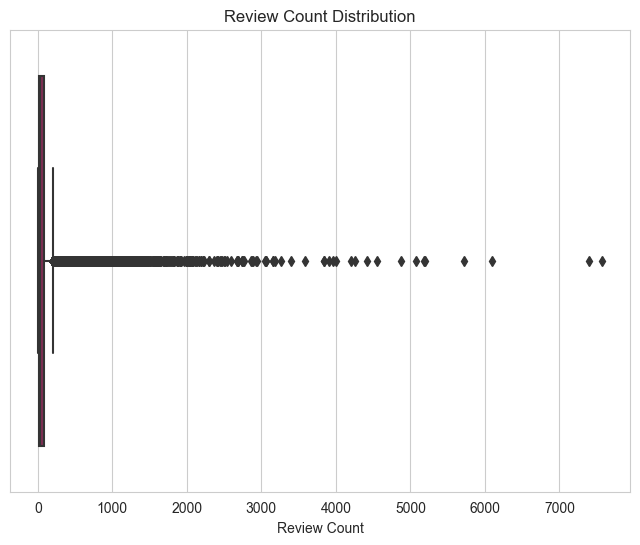

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of the review_count column
plt.figure(figsize=(8, 6))
sns.boxplot(x=business['review_count'], color='#8B2252')
plt.title('Review Count Distribution')
plt.xlabel('Review Count')
plt.show()


In [33]:
# Define the bins for the review_count ranges
bins = [0, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 10000]

# Create a new column 'review_count_range' to store the bin labels
business['review_count_range'] = pd.cut(business['review_count'], bins)

# Group the data by review_count_range and calculate the count and mean
grouped = business.groupby('review_count_range').agg({'review_count': ['count', 'mean']})

# Rename the columns
grouped.columns = ['Business Count', 'Average Review Count']

# Reset the index
grouped = grouped.reset_index()

# Print the grouped data
print(grouped)
grouped.to_clipboard()


  review_count_range  Business Count  Average Review Count
0            (0, 10]            9795              7.222563
1           (10, 20]            9272             15.037317
2           (20, 30]            5799             25.164856
3           (30, 40]            4078             35.232957
4           (40, 50]            3048             45.184383
5          (50, 100]            8603             71.768337
6         (100, 200]            6243            141.056223
7         (200, 500]            4191            301.017180
8        (500, 1000]             961            664.312175
9      (1000, 10000]             296           1776.956081


In [34]:
business_top = business[business['review_count'] > 5000]
business_top = business_top.sort_values(by='review_count', ascending=False)
business_top

,business_id,name,city,stars,review_count,categories,is_restaurant,review_count_range
113732,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,New Orleans,4.0,7568.0,"Live/Raw Food, Restaurants, Seafood, Cajun/Creole",True,"(1000, 10000]"
112553,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,New Orleans,4.0,7400.0,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",True,"(1000, 10000]"
91758,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,Nashville,4.5,6093.0,"American (Traditional), Chicken Shop, Southern...",True,"(1000, 10000]"
143158,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,Philadelphia,4.5,5721.0,"Candy Stores, Shopping, Department Stores, Fas...",True,"(1000, 10000]"
147082,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,New Orleans,4.5,5193.0,"Restaurants, American (Traditional), American ...",True,"(1000, 10000]"
100025,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,New Orleans,3.5,5185.0,"Cajun/Creole, Restaurants, Event Planning & Se...",True,"(1000, 10000]"
31034,VQcCL9PiNL_wkGf-uF3fjg,Royal House,New Orleans,4.0,5070.0,"Restaurants, American (New), Sandwiches, Seafo...",True,"(1000, 10000]"


In [35]:
business_top.to_clipboard()

### MOTHER'S RESTAURANT

In [36]:
#I want to inspect one business - mOTHER'S RESTAURANT

# Assuming 'reviews' is a DataFrame containing the reviews data
one_business = reviews[reviews['business_id'] == 'iSRTaT9WngzB8JJ2YKJUig'].copy()
one_business_copy = one_business.copy()
one_business = one_business_copy.sort_values(by='date')
one_business_copy = None  # To release the memory used by one_business_copy


In [37]:
len(one_business)

5254

In [38]:
# Get the summary statistics for the 'stars' column
summary_stats = one_business['stars'].describe()

# Print the summary statistics
print(summary_stats)

count    5254.000000
mean        3.438713
std         1.337830
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stars, dtype: float64


In [37]:
'''
# Use langid to detect language
one_business["language"] = one_business["text"].apply(langid.classify)

# Print the updated DataFrame
print(one_business)
'''


'\n# Use langid to detect language\none_business["language"] = one_business["text"].apply(langid.classify)\n\n# Print the updated DataFrame\nprint(one_business)\n'

In [38]:
'''
# Remove tuple values
one_business['language'] = one_business['language'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# As expected, English is by far the most common. However, Scotish seems to be extremely popular too, which is unexpected. I will inspect the Scotish reviews more closely, but first let's see what a random selection of the other languages look like.
plt.figure(figsize=(8, 6))
plt.bar(one_business['language'].value_counts().index, one_business['language'].value_counts().values, color='purple')
plt.title('Language Count')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()
'''


"\n# Remove tuple values\none_business['language'] = one_business['language'].apply(lambda x: x[0] if isinstance(x, tuple) else x)\n\n# As expected, English is by far the most common. However, Scotish seems to be extremely popular too, which is unexpected. I will inspect the Scotish reviews more closely, but first let's see what a random selection of the other languages look like.\nplt.figure(figsize=(8, 6))\nplt.bar(one_business['language'].value_counts().index, one_business['language'].value_counts().values, color='purple')\nplt.title('Language Count')\nplt.xlabel('Language')\nplt.ylabel('Count')\nplt.xticks(rotation='vertical')\nplt.show()\n"

In [39]:
'''
#language distribution
one_business['language'].value_counts()
'''

"\n#language distribution\none_business['language'].value_counts()\n"

In [40]:
'''
#detecting other languages
foreignText = one_business[(one_business['language'] != 'en')]
foreignText.iloc[0:22, :].to_clipboard()
'''


"\n#detecting other languages\nforeignText = one_business[(one_business['language'] != 'en')]\nforeignText.iloc[0:22, :].to_clipboard()\n"

In [41]:
'''
#I will remove anything other than english.
one_business = one_business[(one_business['language'] == 'en') ]
'''


"\n#I will remove anything other than english.\none_business = one_business[(one_business['language'] == 'en') ]\n"

In [39]:
one_business

,date,stars,text,business_id
4734097,2005-05-15 00:10:31,4.0,"Pricey and packed, but well worth the wait. Th...",iSRTaT9WngzB8JJ2YKJUig
4745167,2005-07-10 07:38:55,3.0,"Expensive but quality, Mother's has the third ...",iSRTaT9WngzB8JJ2YKJUig
4752745,2005-08-19 19:34:57,5.0,Mother's was started more than six decades as ...,iSRTaT9WngzB8JJ2YKJUig
4738690,2005-11-30 02:19:50,4.0,"A New Orleans institution, Mother's is thankfu...",iSRTaT9WngzB8JJ2YKJUig
4792078,2005-12-28 09:18:18,5.0,"Yummy, yummy! Try the roast beef po' boy with...",iSRTaT9WngzB8JJ2YKJUig
...,...,...,...,...
4849338,2022-01-12 09:32:21,5.0,Mother's is a New Orleans staple open since th...,iSRTaT9WngzB8JJ2YKJUig
4850126,2022-01-13 00:30:01,4.0,I come here every trip to New Orleans sometime...,iSRTaT9WngzB8JJ2YKJUig
4871149,2022-01-13 04:11:51,4.0,"If you want a breakfast full of eggs, buttermi...",iSRTaT9WngzB8JJ2YKJUig
4870953,2022-01-13 04:44:17,4.0,We walked in just before closing and still rec...,iSRTaT9WngzB8JJ2YKJUig


In [40]:
import nltk
from nltk.corpus import stopwords

In [41]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ezgit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

C:\Users\ezgit\AppData\Local\Temp\ipykernel_15076\976873415.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, color='none', lw=2, edgecolor='black', transform=plt.gca().transAxes))


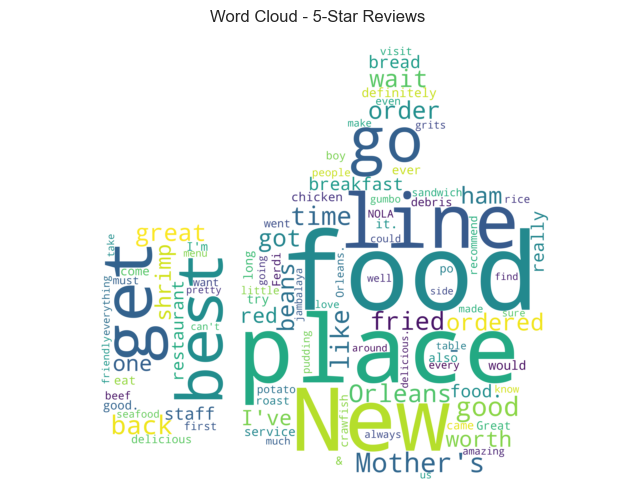

C:\Users\ezgit\AppData\Local\Temp\ipykernel_15076\976873415.py:81: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, color='none', lw=2, edgecolor='black', transform=plt.gca().transAxes))


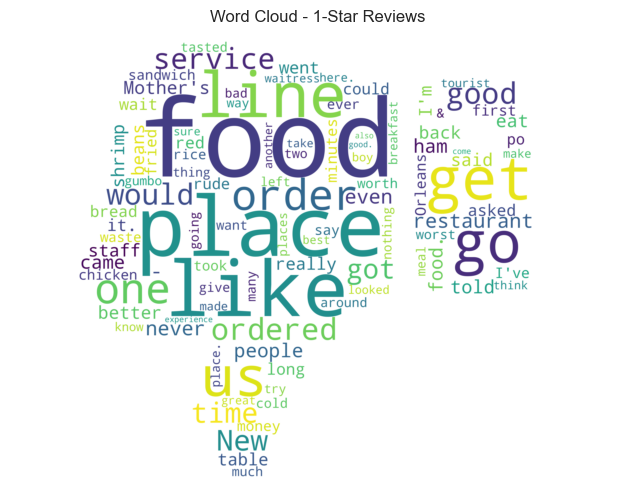

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
from PIL import Image

# Filter reviews by business_id
filtered_reviews = one_business

# Separate 5-star and 1-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Concatenate text data for 5-star reviews
wordcloud_data_5star = five_star_reviews['text'].str.cat(sep=' ')

# Tokenize and filter stopwords for 5-star reviews
tokens_5star = wordcloud_data_5star.split()
stop_words = set(stopwords.words('english'))
filtered_tokens_5star = [word for word in tokens_5star if word.lower() not in stop_words and word.lower()]

# Count word occurrences for 5-star reviews
word_counts_5star = {}
for word in filtered_tokens_5star:
    if word in word_counts_5star:
        word_counts_5star[word] += 1
    else:
        word_counts_5star[word] = 1

# Sort by count and take top 20 for 5-star reviews
sorted_word_counts_5star = sorted(word_counts_5star.items(), key=lambda x: x[1], reverse=True)[:100]

# Check if there are words and counts available for 5-star reviews
if sorted_word_counts_5star:
    # Create WordCloud with thumbs up mask for 5-star reviews
    thumbs_up_img = Image.open(r'C:\yelpdataset\upvote.png')
    thumbs_up_mask = np.array(thumbs_up_img)
    wordcloud_5star = WordCloud(background_color='white', max_words=100, mask=thumbs_up_mask).generate_from_frequencies(dict(sorted_word_counts_5star))

    # Plot the word cloud for 5-star reviews
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_5star, interpolation='bilinear')
    plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, color='none', lw=2, edgecolor='black', transform=plt.gca().transAxes))
    plt.axis('off')
    plt.title('Word Cloud - 5-Star Reviews')
    plt.show()
else:
    print("No word counts available to plot for 5-star reviews.")

# Concatenate text data for 1-star reviews
wordcloud_data_1star = one_star_reviews['text'].str.cat(sep=' ')

# Tokenize and filter stopwords for 1-star reviews
tokens_1star = wordcloud_data_1star.split()
filtered_tokens_1star = [word for word in tokens_1star if word.lower() not in stop_words and word.lower()]

# Count word occurrences for 1-star reviews
word_counts_1star = {}
for word in filtered_tokens_1star:
    if word in word_counts_1star:
        word_counts_1star[word] += 1
    else:
        word_counts_1star[word] = 1

# Sort by count and take top 20 for 1-star reviews
sorted_word_counts_1star = sorted(word_counts_1star.items(), key=lambda x: x[1], reverse=True)[:100]

# Check if there are words and counts available for 1-star reviews
if sorted_word_counts_1star:
    # Create WordCloud with thumbs down mask for 1-star reviews
    thumbs_down_img = Image.open(r'C:\yelpdataset\downvote.png')
    thumbs_down_mask = np.array(thumbs_down_img)
    wordcloud_1star = WordCloud(background_color='white', max_words=100, mask=thumbs_down_mask).generate_from_frequencies(dict(sorted_word_counts_1star))

    # Plot the word cloud for 1-star reviews
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_1star, interpolation='bilinear')
    plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, color='none', lw=2, edgecolor='black', transform=plt.gca().transAxes))
    plt.axis('off')
    plt.title('Word Cloud - 1-Star Reviews')
    plt.show()
else:
    print("No word counts available to plot for 1-star reviews.")


5 star reviews word combinations

In [44]:
import itertools
from collections import Counter
from nltk.corpus import stopwords

# Define stop words list
stop_words = set(stopwords.words('english'))

# Select filtered reviews for a specific business_id
filtered_reviews = one_business

# Select only 5-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]

# Get the concatenated text of all 5-star reviews
all_reviews_text = five_star_reviews['text'].str.cat(sep=' ')

# Convert the text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split the text into words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of adjacent 2 words
word_combinations = list(zip(words[:-1], words[1:]))

# Count the combinations
word_counts = Counter(word_combinations)

# Select the top 200 most common combinations
top_10_combinations = word_counts.most_common(200)

# Print the results
for combination, count in top_10_combinations:
    print(combination, count)


('new', 'orleans') 478
('po', 'boy') 240
('red', 'beans') 207
('beans', 'rice') 184
('bread', 'pudding') 177
('fried', 'chicken') 154
('roast', 'beef') 145
('potato', 'salad') 105
('worth', 'wait') 95
('ferdi', 'special') 90
('ive', 'ever') 78
('great', 'food') 69
('baked', 'ham') 68
('go', 'back') 68
('highly', 'recommend') 59
('come', 'back') 58
('po', 'boys') 57
('every', 'time') 56
('famous', 'ferdi') 55
('wait', 'line') 55
('seafood', 'gumbo') 52
('line', 'door') 51
('green', 'beans') 51
('first', 'time') 50
('crawfish', 'etouffee') 49
('turnip', 'greens') 48
('long', 'line') 47
('one', 'best') 46
('food', 'great') 46
('fried', 'shrimp') 44
('shrimp', 'po') 43
('crawfish', 'etoufee') 43
('good', 'food') 43
('next', 'time') 43
('really', 'good') 41
('au', 'jus') 40
('food', 'amazing') 39
('well', 'worth') 39
('crawfish', 'étouffée') 39
('beef', 'debris') 36
('cafeteria', 'style') 36
('shrimp', 'creole') 36
('make', 'sure') 35
('food', 'good') 35
('service', 'great') 35
('pecan', 'p

In [49]:
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Select filtered reviews for a specific business_id
filtered_reviews = one_business

# Select only 5-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]

# Get the concatenated text of all 5-star reviews
all_reviews_text = five_star_reviews['text'].str.cat(sep=' ')

# Convert the text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split the text into words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of adjacent 3 words
word_combinations = list(zip(words[:-2], words[1:-1], words[2:]))

# Count the combinations
word_counts = Counter(word_combinations)

# Select the top 200 most common combinations
top_10_combinations = word_counts.most_common(200)

# Print the results
for combination, count in top_10_combinations:
    print(combination, count)


('red', 'beans', 'rice') 175
('shrimp', 'po', 'boy') 41
('roast', 'beef', 'debris') 31
('famous', 'ferdi', 'special') 30
('ham', 'roast', 'beef') 29
('visit', 'new', 'orleans') 28
('sweet', 'potato', 'pie') 23
('back', 'new', 'orleans') 21
('visiting', 'new', 'orleans') 20
('wait', 'go', 'back') 20
('cant', 'wait', 'go') 19
('oyster', 'po', 'boy') 19
('trip', 'new', 'orleans') 19
('best', 'ive', 'ever') 18
('debris', 'po', 'boy') 17
('well', 'worth', 'wait') 17
('best', 'fried', 'chicken') 17
('best', 'bread', 'pudding') 16
('green', 'beans', 'tomatoes') 16
('roast', 'beef', 'po') 15
('cant', 'go', 'wrong') 15
('po', 'boy', 'delicious') 15
('highly', 'recommend', 'place') 15
('roast', 'beef', 'poboy') 14
('soft', 'shell', 'crab') 14
('next', 'time', 'im') 14
('new', 'orleans', 'food') 14
('definitely', 'come', 'back') 14
('definitely', 'worth', 'wait') 14
('shrimp', 'oyster', 'po') 14
('beef', 'po', 'boy') 13
('best', 'baked', 'ham') 13
('new', 'orleans', 'mothers') 13
('go', 'new', 'o

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ezgit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1 star reviews word combinations

In [50]:
sorted_word_counts_1star

[('food', 604),
 ('place', 332),
 ('like', 282),
 ('line', 228),
 ('get', 206),
 ('go', 193),
 ('us', 177),
 ('order', 173),
 ('one', 170),
 ('ordered', 169),
 ('good', 162),
 ('would', 158),
 ('service', 157),
 ('New', 152),
 ('time', 146),
 ('got', 138),
 ('restaurant', 133),
 ('never', 132),
 ('even', 132),
 ('people', 122),
 ('ham', 119),
 ('came', 118),
 ('food.', 118),
 ('told', 115),
 ('-', 114),
 ('eat', 112),
 ("Mother's", 110),
 ('better', 107),
 ('shrimp', 107),
 ('said', 105),
 ("I'm", 104),
 ('back', 104),
 ('staff', 104),
 ('beans', 102),
 ('really', 101),
 ('table', 99),
 ('went', 97),
 ('it.', 96),
 ('red', 91),
 ('wait', 90),
 ('asked', 90),
 ('long', 89),
 ('bread', 88),
 ('could', 86),
 ('fried', 86),
 ('rude', 83),
 ('minutes', 82),
 ('po', 80),
 ('first', 79),
 ('Orleans', 78),
 ("I've", 77),
 ('money', 76),
 ('sandwich', 76),
 ('chicken', 76),
 ('took', 75),
 ('say', 75),
 ('waste', 73),
 ('ever', 73),
 ('rice', 72),
 ('worth', 71),
 ('worst', 68),
 ('cold', 68),


In [47]:
import itertools
from collections import Counter

# Define stop words list
stop_words = set(stopwords.words('english'))

# Select filtered reviews for a specific business_id
filtered_reviews = one_business

# Select only 1-star reviews
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Get the concatenated text of all 1-star reviews
all_reviews_text = one_star_reviews['text'].str.cat(sep=' ')

# Convert the text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split the text into words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of adjacent 2 words
word_combinations = list(zip(words[:-1], words[1:]))

# Count the combinations
word_counts = Counter(word_combinations)

# Select the top 200 most common combinations
top_10_combinations = word_counts.most_common(200)

# Print the results
for combination, count in top_10_combinations:
    print(combination, count)


('new', 'orleans') 146
('po', 'boy') 91
('red', 'beans') 86
('beans', 'rice') 69
('tourist', 'trap') 52
('fried', 'chicken') 50
('tasted', 'like') 45
('roast', 'beef') 44
('waste', 'time') 38
('go', 'back') 37
('customer', 'service') 34
('long', 'line') 31
('bread', 'pudding') 31
('potato', 'salad') 30
('told', 'us') 28
('shrimp', 'po') 26
('30', 'minutes') 25
('first', 'time') 25
('waste', 'money') 24
('dont', 'waste') 24
('po', 'boys') 23
('somewhere', 'else') 23
('never', 'go') 23
('time', 'money') 23
('food', 'good') 22
('wait', 'line') 21
('baked', 'ham') 21
('line', 'order') 20
('nothing', 'special') 20
('ive', 'ever') 20
('food', 'cold') 20
('staff', 'rude') 20
('seafood', 'gumbo') 20
('dont', 'know') 19
('shrimp', 'poboy') 19
('20', 'minutes') 19
('ferdi', 'special') 19
('didnt', 'even') 19
('food', 'bland') 19
('fried', 'shrimp') 18
('order', 'food') 18
('food', 'came') 18
('im', 'sure') 17
('much', 'better') 17
('seafood', 'platter') 17
('go', 'mothers') 17
('would', 'recomme

In [48]:
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Select filtered reviews for a specific business_id
filtered_reviews = one_business

# Select only 1-star reviews
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Get the concatenated text of all 1-star reviews
all_reviews_text = one_star_reviews['text'].str.cat(sep=' ')

# Convert the text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split the text into words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of adjacent 3 words
word_combinations = list(zip(words[:-2], words[1:-1], words[2:]))

# Count the combinations
word_counts = Counter(word_combinations)

# Select the top 200 most common combinations
top_10_combinations = word_counts.most_common(200)

# Print the results
for combination, count in top_10_combinations:
    print(combination, count)


('red', 'beans', 'rice') 66
('shrimp', 'po', 'boy') 25
('dont', 'waste', 'time') 20
('waste', 'time', 'money') 14
('go', 'somewhere', 'else') 13
('soft', 'shell', 'crab') 10
('never', 'go', 'back') 10
('visit', 'new', 'orleans') 9
('visiting', 'new', 'orleans') 9
('food', 'mediocre', 'best') 8
('sweet', 'potato', 'pie') 8
('famous', 'ferdi', 'special') 7
('dont', 'understand', 'hype') 6
('eat', 'new', 'orleans') 6
('nothing', 'write', 'home') 6
('ham', 'po', 'boy') 6
('waste', 'money', 'time') 6
('beans', 'rice', 'bland') 5
('dont', 'believe', 'hype') 5
('world', 'famous', 'ham') 5
('ferdi', 'po', 'boy') 5
('po', 'boy', 'bread') 5
('best', 'baked', 'ham') 5
('ordered', 'breakfast', 'special') 5
('line', 'place', 'order') 5
('roast', 'beef', 'sandwich') 5
('would', 'never', 'go') 5
('worst', 'food', 'ive') 5
('tourist', 'trap', 'food') 5
('never', 'come', 'back') 5
('worlds', 'best', 'ham') 5
('single', 'file', 'line') 5
('save', 'time', 'money') 5
('menu', 'get', 'line') 5
('long', 'li

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ezgit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
